<a href="https://colab.research.google.com/github/naveen312/DS-BY-NAVEEN/blob/main/ASSIGNMENT_CLUSTERING_(CRIME_DATA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
print("Libraries Imported")

Libraries Imported


In [2]:
df=pd.read_csv("/content/crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df.shape

(50, 5)

In [4]:
df['Unnamed: 0'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [5]:
df.rename(columns={'Unnamed: 0':'States'},inplace=True)
df.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
scaler = MinMaxScaler()
names = df.columns[1:]
d = scaler.fit_transform(df.iloc[:,1:])
norm_df = pd.DataFrame(d, columns=names)

In [7]:
norm_df.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [8]:
norm_df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.360000
std,0.262380,0.285403,0.245335,0.242025
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.200904
50%,0.388554,0.390411,0.576271,0.330749
75%,0.629518,0.698630,0.775424,0.487726
max,1.000000,1.000000,1.000000,1.000000


In [9]:
df1=norm_df.copy()

<Axes: xlabel='Rape', ylabel='Count'>

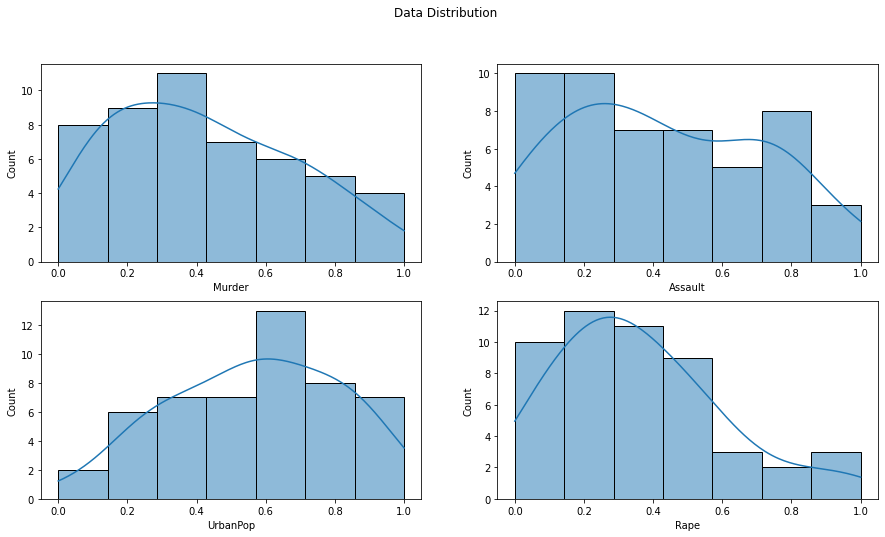

In [10]:
fig, axes = plt.subplots(2,2, figsize=(15,8))

fig.suptitle('Data Distribution')

sns.histplot(ax=axes[0, 0],x=df1['Murder'],kde=True)
sns.histplot(ax=axes[0, 1],x=df1['Assault'],kde=True)
sns.histplot(ax=axes[1, 0],x=df1['UrbanPop'],kde=True)
sns.histplot(ax=axes[1, 1],x=df1['Rape'],kde=True)

<Axes: xlabel='Rape'>

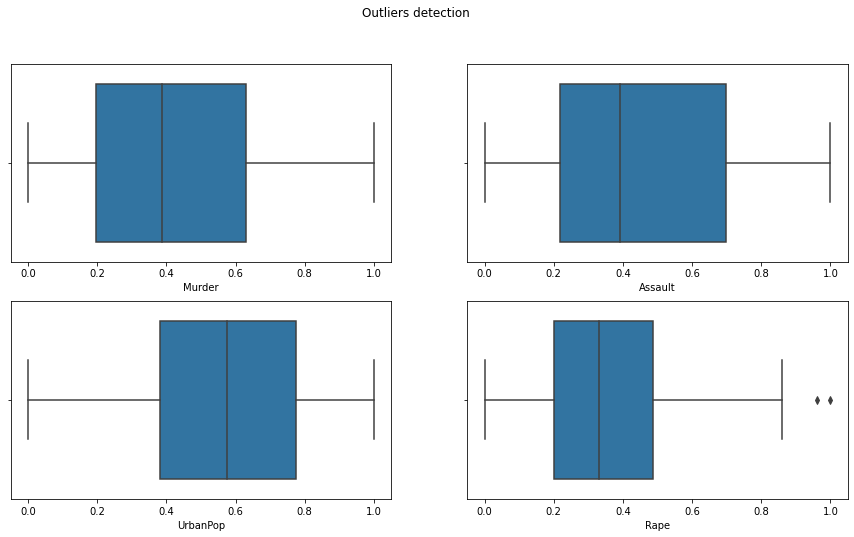

In [11]:
fig, axes = plt.subplots(2,2, figsize=(15,8))

fig.suptitle('Outliers detection')

sns.boxplot(ax=axes[0, 0],x=df1['Murder'])
sns.boxplot(ax=axes[0, 1],x=df1['Assault'])
sns.boxplot(ax=axes[1, 0],x=df1['UrbanPop'])
sns.boxplot(ax=axes[1, 1],x=df1['Rape'])

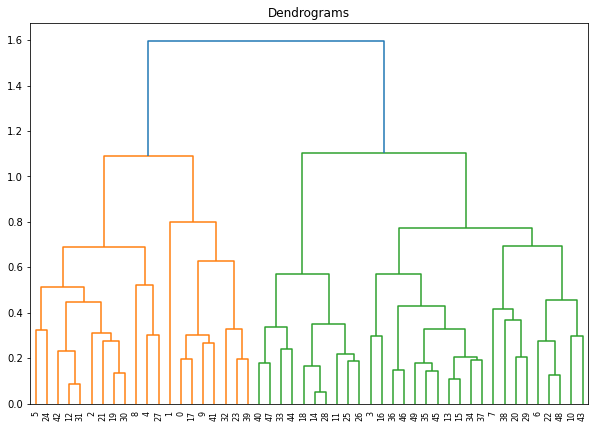

In [12]:
# Drawing the dendrogram
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(df1, method='complete'))

In [13]:
# Creating a loop to calculate the maximum silhouette score and its corresponding number of clusters
# By iterating through various cluster numbers

scores=[]
hc_score=0
hc_cluster=0
i=0
for c in range(3,10):
    hc= AgglomerativeClustering(n_clusters=c, affinity = 'euclidean', linkage = 'complete')
    hc_pred = hc.fit_predict(df1)
    score= silhouette_score (df1, hc_pred, metric='euclidean')
    scores.append(score)
    i=i+1
    if (score>=max(scores)):
        hc_score=round(score,3)
        hc_cluster=c
        
        
print("Maximum silhouette score is {} for optimal number of clusters-{}.".format(hc_score,hc_cluster))
print("Number of iterations:",i)


Maximum silhouette score is 0.309 for optimal number of clusters-3.
Number of iterations: 7


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be remo

In [14]:
# Fitting the data with 3 clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
hc_pred = hc.fit_predict(df1)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [15]:
hc_df=df1.copy()
hc_df['Clusters']=hc_pred
hc_df.head()

,Murder,Assault,UrbanPop,Rape,Clusters
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,0
2,0.439759,0.852740,0.813559,0.612403,0
3,0.481928,0.496575,0.305085,0.315245,1
4,0.493976,0.791096,1.000000,0.860465,0


In [16]:
# Using groupby function to sort by Clusters
hc_df.groupby(['Clusters']).mean()


,Murder,Assault,UrbanPop,Rape
Clusters,,,,
0,0.684639,0.720034,0.616949,0.564987
1,0.296084,0.298973,0.657627,0.279070
2,0.143373,0.115411,0.293220,0.111886


# Algorithm used--- K-Means Clustering

In [33]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

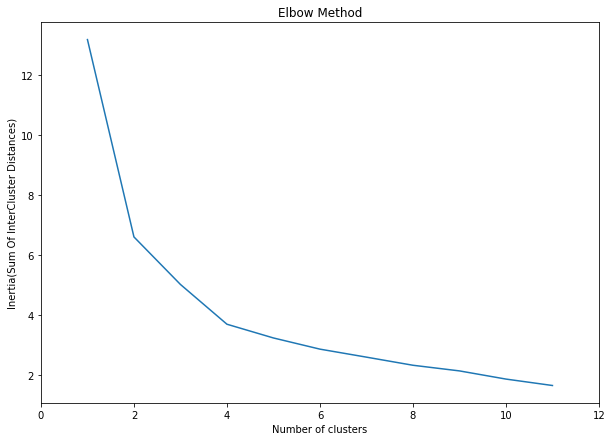

In [34]:
# Finding the optimum number of Clusters using Elbow plot
wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,7))    
plt.plot(range(1, 12), wcss)
plt.title('Elbow Method')
plt.xlim(0,12)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia(Sum Of InterCluster Distances)')
plt.show()

### From above Elbow plot ,we can see that optimum number of clusters is between 2-6.

In [35]:
# Creating a loop to calculate the maximum silhouette score and its corresponding number of clusters
# By iterating through various cluster numbers

scores=[]
km_score=0
km_cluster=0
i=0
for c in range(2,7):
    km= KMeans(n_clusters=c, random_state=0)
    km_pred = km.fit_predict(df1)
    score= silhouette_score (df1, km_pred, metric='euclidean')
    scores.append(score)
    i=i+1
    if (score>=max(scores)):
        km_score=round(score,3)
        km_cluster=c
        
print("Maximum silhouette score is {} for optimal number of clusters-{}.".format(km_score,km_cluster))
print("Number of iterations:",i)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Maximum silhouette score is 0.424 for optimal number of clusters-2.
Number of iterations: 5


In [36]:
# Fitting with 2 clusters
# Fitting the model to 2 clusters
km2= KMeans(n_clusters=2, random_state=0)
km2_pred = km2.fit_predict(df1)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [37]:
km_df=df1.copy()
km_df['clusters']=km2_pred
km_df.head()

,Murder,Assault,UrbanPop,Rape,clusters
0,0.746988,0.654110,0.440678,0.359173,1
1,0.554217,0.746575,0.271186,0.961240,1
2,0.439759,0.852740,0.813559,0.612403,1
3,0.481928,0.496575,0.305085,0.315245,0
4,0.493976,0.791096,1.000000,0.860465,1


In [38]:
# using Groupby
km_df.groupby(['clusters']).mean()

,Murder,Assault,UrbanPop,Rape
clusters,,,,
0,0.245181,0.237785,0.536158,0.223342
1,0.684639,0.720034,0.616949,0.564987


## Algorithm used---- DBSCAN Clustering

For minimum points rule of thumb is to derive minPts from the number of dimensions D in the data set. minPts >= D + 1. For 2D data, take minPts = 4. For larger datasets, with much noise, it suggested to go with minPts = 2 * D.
If your data has more than 2 dimensions, choose MinPts = 2*dim, where dim= the dimensions of your data set (Sander et al., 1998).

### Here min points = 6 

### For selecting optimum epsilon value,we will use K-distance graph.

In [39]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=6)
nbrs  = neigh.fit(df1)
distances, indices = nbrs.kneighbors(df1)

In [40]:
distances[0:5]

array([[0.        , 0.19646763, 0.22136539, 0.23825846, 0.2943175 ,
        0.32288317],
       [0.        , 0.50447453, 0.51956614, 0.55866649, 0.57734462,
        0.58123796],
       [0.        , 0.26458421, 0.27892512, 0.27973121, 0.30490879,
        0.31219881],
       [0.        , 0.25152017, 0.25178413, 0.29643718, 0.33823425,
        0.33968976],
       [0.        , 0.30350213, 0.3209896 , 0.34080802, 0.37850561,
        0.41139393]])

In [41]:
distances.shape

(50, 6)

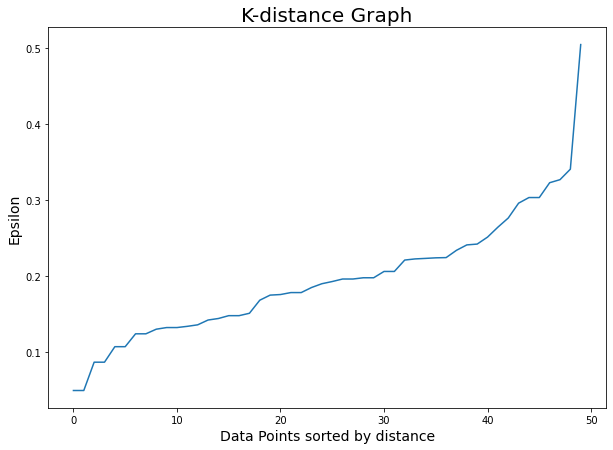

In [42]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.figure(figsize=(10,7))
plt.plot(distances)

plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph. Here epsilon is between 0.3-0.5.

In [43]:
from sklearn.cluster import DBSCAN

In [44]:
scores=[]

db_score=0
samp=0
eps=0

i=0

for s in range(6,12,1):
    
    for e in np.arange(0.30,0.60,0.05):
        
        db=DBSCAN(eps=e,min_samples=s)
        db.fit(df1)
        db_pred=db.labels_
        u=len(set(db_pred))
              
        if(u>1):
            score= silhouette_score (df1, db_pred, metric='euclidean')
            scores.append(score)
            i=i+1
            if(score>=max(scores)):
                db_score=round(score,3)
                eps=e
                samp=s
                
print("Maximum silhouette score is {} for minimum number of samples-{} and epsilon value-{}.".format(db_score,samp,eps))
print("Number of iterations:",i)



Maximum silhouette score is 0.378 for minimum number of samples-7 and epsilon value-0.3.
Number of iterations: 30


In [45]:
db=DBSCAN(eps=0.30,min_samples=7)
db.fit(df1)
db_pred=db.labels_

In [46]:
dbs_df=df1.copy()
dbs_df['clusters']=db_pred
dbs_df.head()

,Murder,Assault,UrbanPop,Rape,clusters
0,0.746988,0.654110,0.440678,0.359173,-1
1,0.554217,0.746575,0.271186,0.961240,-1
2,0.439759,0.852740,0.813559,0.612403,-1
3,0.481928,0.496575,0.305085,0.315245,0
4,0.493976,0.791096,1.000000,0.860465,-1


In [47]:
# Using groupby function to sort by Clusters
dbs_df.groupby(['clusters']).mean()


,Murder,Assault,UrbanPop,Rape
clusters,,,,
-1,0.656053,0.695695,0.630347,0.538698
0,0.250727,0.238781,0.523670,0.230598


In [48]:
# Silhouette score table
s={'Clustering techniques':['Hierarchical clustering','K-Means clustering','DBSCAN'],
   'Silhouette score':[hc_score,km_score,db_score],
   'Clusters Predicted':[hc_cluster,km_cluster,1]}
clust=pd.DataFrame(s)
clust

,Clustering techniques,Silhouette score,Clusters Predicted
0,Hierarchical clustering,0.309,3
1,K-Means clustering,0.424,2
2,DBSCAN,0.378,1


From above dataframe, it can be seen that silhouette score for K-Means Clustering is highest with two predicted clusters.